# Load Data

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load
df = pd.read_csv('Data/Crimes_-_2001_to_Present.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369706 entries, 0 to 369705
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    369706 non-null  int64  
 1   Case Number           369706 non-null  object 
 2   Date                  369706 non-null  object 
 3   Block                 369706 non-null  object 
 4   IUCR                  369706 non-null  object 
 5   Primary Type          369706 non-null  object 
 6   Description           369706 non-null  object 
 7   Location Description  367003 non-null  object 
 8   Arrest                369706 non-null  bool   
 9   Domestic              369706 non-null  bool   
 10  Beat                  369706 non-null  int64  
 11  District              369705 non-null  float64
 12  Ward                  369497 non-null  float64
 13  Community Area        369497 non-null  float64
 14  FBI Code              369706 non-null  object 
 15  

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,42.0,32.0,11,NaN,NaN,2015.0,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,71.0,11,NaN,NaN,2014.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN


# Prepare Date Time Index

In [3]:
# Change 'Date' object to datetime
df['Date'] = pd.to_datetime(df['Date']) 

In [4]:
# Set index
df = df.set_index('Date')
df.index

DatetimeIndex(['2015-03-18 12:00:00', '2018-12-20 15:00:00',
               '2016-05-01 00:25:00', '2018-12-20 16:00:00',
               '2014-06-01 00:01:00', '2018-09-01 00:01:00',
               '2018-01-01 08:00:00', '2018-04-01 00:01:00',
               '2015-02-02 10:00:00', '2012-05-05 12:25:00',
               ...
               '2021-03-26 10:10:00', '2020-12-04 23:30:00',
               '2021-05-09 09:00:00', '2020-11-18 16:00:00',
               '2021-04-11 23:05:00', '2021-03-13 02:00:00',
               '2021-05-13 19:00:00', '2021-05-31 08:12:00',
               '2020-12-27 09:00:00', '2021-05-01 16:55:00'],
              dtype='datetime64[ns]', name='Date', length=369706, freq=None)

# Stakeholder Questions

## 1. Comparing Police Districts
- Which district had the most crimes in 2022?
- Which had the least?

In [5]:
# Slice out only data from 2022
year_2022 = df.loc['2022',['District']]
year_2022

,District
Date,
2022-01-11 15:00:00,4.0
2022-01-14 15:55:00,7.0
2022-08-05 21:00:00,3.0
2022-08-14 14:00:00,16.0
2022-11-10 03:47:00,7.0
...,...
2022-12-01 00:00:00,11.0
2022-08-19 09:00:00,11.0
2022-08-22 00:00:00,15.0


In [6]:
# Value counts
year_2022_crime_counts = year_2022['District'].value_counts().sort_values()
year_2022_crime_counts

31.0      1
15.0     67
20.0     72
17.0     94
10.0     94
22.0    109
24.0    109
14.0    115
5.0     129
3.0     131
7.0     132
4.0     142
9.0     144
6.0     159
2.0     168
11.0    178
25.0    183
18.0    193
16.0    211
1.0     218
12.0    225
19.0    233
8.0     281
Name: District, dtype: int64

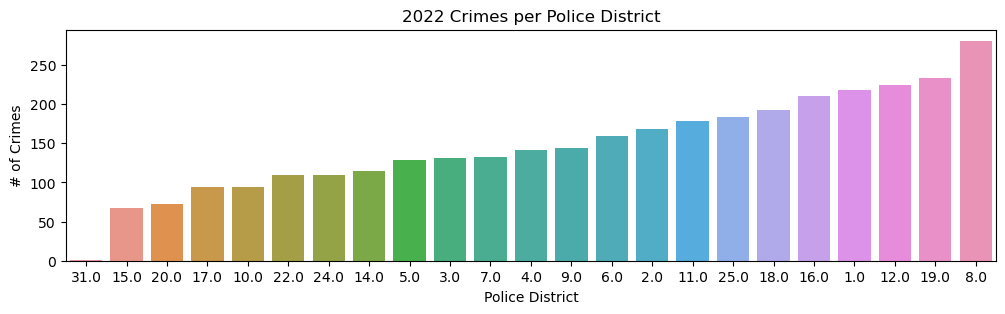

In [7]:
# Visualize
fig, ax = plt.subplots(figsize = (12,3))
ax = sns.countplot(data = year_2022, x = 'District', order = year_2022_crime_counts.index)
ax.set(title = '2022 Crimes per Police District', ylabel = '# of Crimes', xlabel = 'Police District');

- Based on the graph:
 - Which district had the most crimes in 2022?
   - District 8
 - Which had the least
   - District 31?

## 2. Crimes Across the Years:
- Is the total number of crimes increasing or decreasing across the years?
- Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)

In [8]:
# Create year column
df['Year'] = df.index.year
df['Year']

Date
2015-03-18 12:00:00    2015
2018-12-20 15:00:00    2018
2016-05-01 00:25:00    2016
2018-12-20 16:00:00    2018
2014-06-01 00:01:00    2014
                       ... 
2021-03-13 02:00:00    2021
2021-05-13 19:00:00    2021
2021-05-31 08:12:00    2021
2020-12-27 09:00:00    2020
2021-05-01 16:55:00    2021
Name: Year, Length: 369706, dtype: int64

In [9]:
# Check crime count per year
crime_count = df['Year'].value_counts().sort_index()
crime_count

2001      175
2002      234
2003      174
2004      563
2005    90146
2006     5000
2007       80
2008      366
2009      360
2010      119
2011      131
2012      141
2013      195
2014      301
2015      390
2016      446
2017      569
2018     1336
2019     1790
2020    58591
2021    74893
2022     3388
2023    88069
2024    42249
Name: Year, dtype: int64

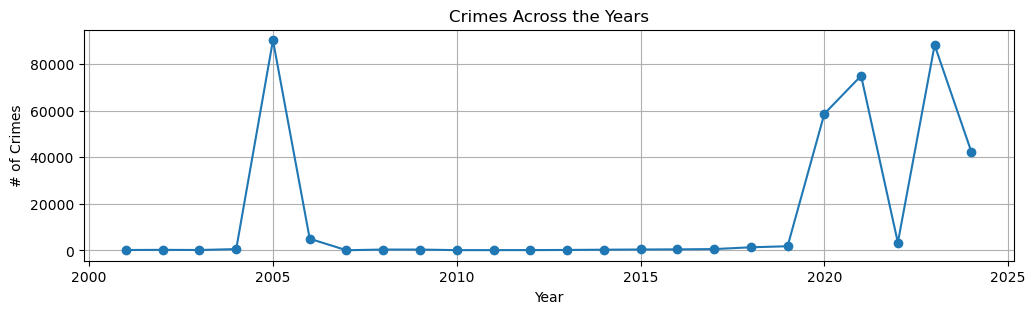

In [10]:
# 1. Visualization 
crime_count.plot(style = 'o-', grid = True, figsize = (12,3))
plt.title('Crimes Across the Years')
plt.xlabel('Year')
plt.ylabel('# of Crimes');

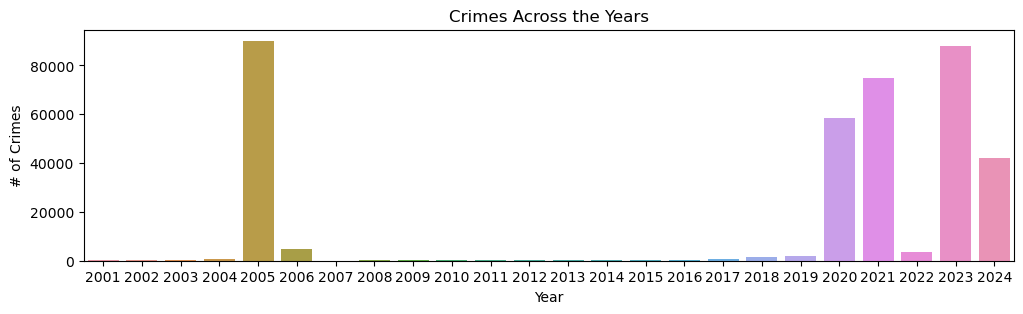

In [11]:
# 2. Visualization
fig, ax = plt.subplots(figsize = (12,3))
ax = sns.countplot(data = df, x = 'Year')
ax.set(title = 'Crimes Across the Years', ylabel = '# of Crimes');

- Crimes across the years have fluctuated throughout the periods of 2000 to 2024.
- It may be difficult to conclude if crimes are increasing or decreasing wihtout identiying any existing pattern in the timeframe of years

In [12]:
# Check types of crimes 
df['Primary Type'].value_counts().index

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'ASSAULT', 'DECEPTIVE PRACTICE',
       'MOTOR VEHICLE THEFT', 'OTHER OFFENSE', 'NARCOTICS', 'ROBBERY',
       'BURGLARY', 'WEAPONS VIOLATION', 'CRIMINAL TRESPASS',
       'OFFENSE INVOLVING CHILDREN', 'CRIMINAL SEXUAL ASSAULT', 'SEX OFFENSE',
       'PUBLIC PEACE VIOLATION', 'PROSTITUTION', 'ARSON',
       'INTERFERENCE WITH PUBLIC OFFICER', 'STALKING', 'HOMICIDE',
       'CRIM SEXUAL ASSAULT', 'LIQUOR LAW VIOLATION', 'GAMBLING',
       'INTIMIDATION', 'KIDNAPPING', 'CONCEALED CARRY LICENSE VIOLATION',
       'OBSCENITY', 'PUBLIC INDECENCY', 'HUMAN TRAFFICKING',
       'OTHER NARCOTIC VIOLATION', 'NON-CRIMINAL', 'RITUALISM'],
      dtype='object')

In [13]:
# Top 5 crime counts
df['Primary Type'].value_counts().index[:5]

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'ASSAULT', 'DECEPTIVE PRACTICE'], dtype='object')

In [14]:
# One-hot-encode 'Primary Type' column to count specific crime per year
ohe = pd.get_dummies(df['Primary Type'])
ohe.head(3)

,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-18 12:00:00,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2018-12-20 15:00:00,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2016-05-01 00:25:00,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Create a sliced df of top five crimes
crime_df = ohe[['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'ASSAULT', 'DECEPTIVE PRACTICE']]

In [16]:
# Resample data to years
crime_df_Y = crime_df.resample('Y').sum()

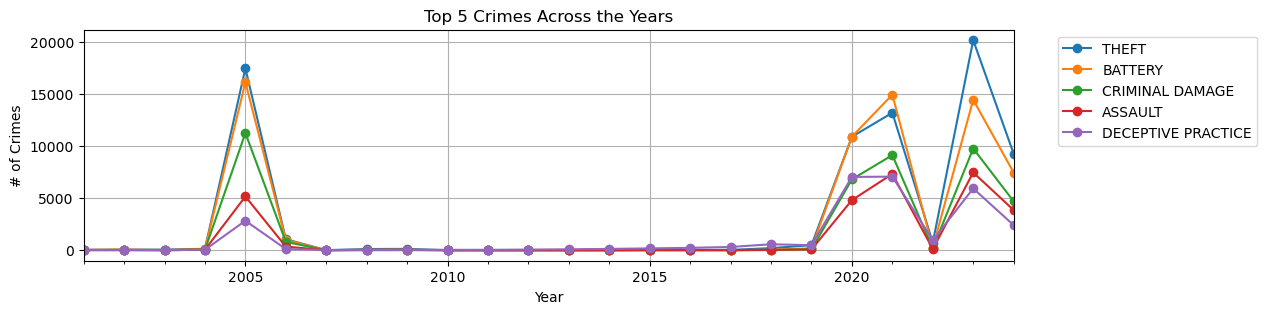

In [17]:
# Visualization
fig, ax = plt.subplots()
crime_df_Y.plot(figsize = (12,3), grid = True, style = 'o-', ax = ax)
ax.set(title = 'Top 5 Crimes Across the Years', ylabel = '# of Crimes', xlabel = 'Year')
ax.legend(loc='best', bbox_to_anchor=(1.04, 1));

- Are there any individual crimes increasing or decreasing across the years?
  - Based on the top 5 crime categories, it seems that these crimes increase or decrease simultaneously. 

## 3. Comparing AM vs. PM Rush Hour:
- Are Crimes more common during AM rush hour or PM rush hour?
  - You can consider any crime that occured between 7 AM - 10 AM as AM rush hour
  - You can consider any crime that occured between 7 AM - 10 AM as PM rush hour 

Anwer the following questions:
- What are the top 5 most common crimes during AM rush hour? What are the top 5 most commmon crimes during PM rush hour?
- Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour? 

In [18]:
# Create hour column
df['Hour'] = df.index.hour
df['Hour']

Date
2015-03-18 12:00:00    12
2018-12-20 15:00:00    15
2016-05-01 00:25:00     0
2018-12-20 16:00:00    16
2014-06-01 00:01:00     0
                       ..
2021-03-13 02:00:00     2
2021-05-13 19:00:00    19
2021-05-31 08:12:00     8
2020-12-27 09:00:00     9
2021-05-01 16:55:00    16
Name: Hour, Length: 369706, dtype: int64

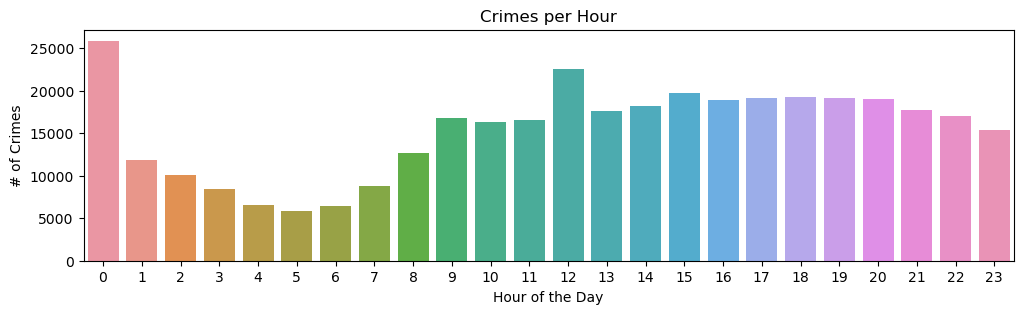

In [19]:
# Visualize crime per hour
fig, ax = plt.subplots(figsize = (12,3))
ax = sns.countplot(data = df, x = 'Hour')
ax.set(title = 'Crimes per Hour', xlabel = 'Hour of the Day', ylabel = '# of Crimes');

In [28]:
df2 = pd.concat([df, ohe], axis = 1)
df2

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-18 12:00:00,11037294,JA371270,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,111,...,0,0,0,0,0,0,0,0,0,0
2018-12-20 15:00:00,11646293,JC213749,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,2515,...,0,0,0,0,0,0,0,0,0,0
2016-05-01 00:25:00,11645836,JC212333,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,...,0,0,0,0,0,0,0,0,0,0
2018-12-20 16:00:00,11645959,JC211511,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,...,1,0,0,0,0,0,0,0,0,0
2014-06-01 00:01:00,11645601,JC212935,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2222,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-13 02:00:00,12316661,JE170767,060XX S MAY ST,0810,THEFT,OVER $500,RESIDENCE,False,False,712,...,0,0,0,0,0,0,0,0,1,0
2021-05-13 19:00:00,12364752,JE229177,065XX S CHAMPLAIN AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,321,...,0,0,0,0,0,0,0,0,0,0
2021-05-31 08:12:00,12380554,JE248618,066XX S HARTWELL AVE,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,RESIDENCE,False,False,322,...,0,0,0,0,0,0,0,0,0,1


In [29]:
# Resample data to hours
crime_df_H = df2.resample('H').sum()
crime_df_H

C:\Users\JOSH\AppData\Local\Temp\ipykernel_8288\1506049624.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  crime_df_H = df2.resample('H').sum()


,ID,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01 00:00:00,73109287,0,3,9567,94.0,174.0,353.0,5863060.0,9281290.0,18009,...,0,0,0,0,0,0,0,0,4,0
2001-01-01 01:00:00,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2001-01-01 02:00:00,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2001-01-01 03:00:00,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2001-01-01 04:00:00,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-06 20:00:00,508866954,8,8,43641,428.0,856.0,1445.0,41784869.0,67945926.0,76912,...,3,3,0,0,0,4,0,0,3,2
2024-03-06 21:00:00,334778611,6,5,24735,242.0,457.0,990.0,29028089.0,47142827.0,50600,...,1,0,0,0,0,1,0,0,5,1
2024-03-06 22:00:00,200870270,4,2,18759,184.0,356.0,526.0,17421013.0,28387328.0,30360,...,1,0,0,0,0,1,0,0,5,1


In [45]:
# AM Rush hour
seven_AM = df2.loc[df['Hour'] == 7]
eight_AM = df2.loc[df['Hour'] == 8]
nine_AM = df2.loc[df['Hour'] == 9]
ten_AM = df2.loc[df['Hour'] == 10]

In [47]:
# PM Rush Hour
sixteen_PM = df2.loc[df['Hour'] == 16]
seventeen_PM = df2.loc[df['Hour'] == 17]
eighteen_PM = df2.loc[df['Hour'] == 18]
nineteen_PM = df2.loc[df['Hour'] == 19]

In [48]:
# AM and PM Dataframe
AM_Frames = [seven_AM, eight_AM, nine_AM, ten_AM]
PM_Frames = [sixteen_PM, seventeen_PM, eighteen_PM, nineteen_PM]

In [50]:
# AM Rush Hour dataframe
am_df = pd.concat(AM_Frames)
am_df.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-06 07:45:00,12072697,JD257284,065XX S UNIVERSITY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,OTHER (SPECIFY),False,False,321,...,1,0,0,0,0,0,0,0,0,0
2018-03-09 07:00:00,11649676,JC217968,050XX S DR MARTIN LUTHER KING JR DR,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,223,...,0,0,0,0,0,0,0,0,0,0
2019-04-05 07:10:00,11645224,JC212415,001XX W IDA B WELLS DR,0810,THEFT,OVER $500,CTA TRAIN,False,False,121,...,0,0,0,0,0,0,0,0,1,0
2020-06-18 07:00:00,12081552,JD268138,096XX S VANDERPOEL AVE,0820,THEFT,$500 AND UNDER,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,2213,...,0,0,0,0,0,0,0,0,1,0
2020-07-27 07:00:00,12119968,JD313759,035XX N LEAVITT ST,0620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE - GARAGE,False,False,1921,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# PM Rush Hour dataframe
pm_df = pd.concat(PM_Frames)
pm_df.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-20 16:00:00,11645959,JC211511,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,...,1,0,0,0,0,0,0,0,0,0
2020-04-07 16:50:00,12028031,JD204153,064XX S DR MARTIN LUTHER KING JR DR,0420,BATTERY,AGGRAVATED - KNIFE / CUTTING INSTRUMENT,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,312,...,0,0,0,0,0,0,0,0,0,0
2018-06-07 16:50:00,11649947,JC217353,047XX S INGLESIDE AVE,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,DEPARTMENT STORE,False,False,222,...,0,0,0,0,0,0,0,0,0,0
2006-02-26 16:00:00,4607506,HM202388,031XX N CLARK ST,0860,THEFT,RETAIL THEFT,DRUG STORE,False,False,2332,...,0,0,0,0,0,0,0,0,1,0
2018-10-05 16:15:00,11651475,JC219287,102XX W ZEMKE RD,1206,DECEPTIVE PRACTICE,"THEFT BY LESSEE,MOTOR VEH",OTHER,False,False,1654,...,0,0,0,0,0,0,0,0,0,0


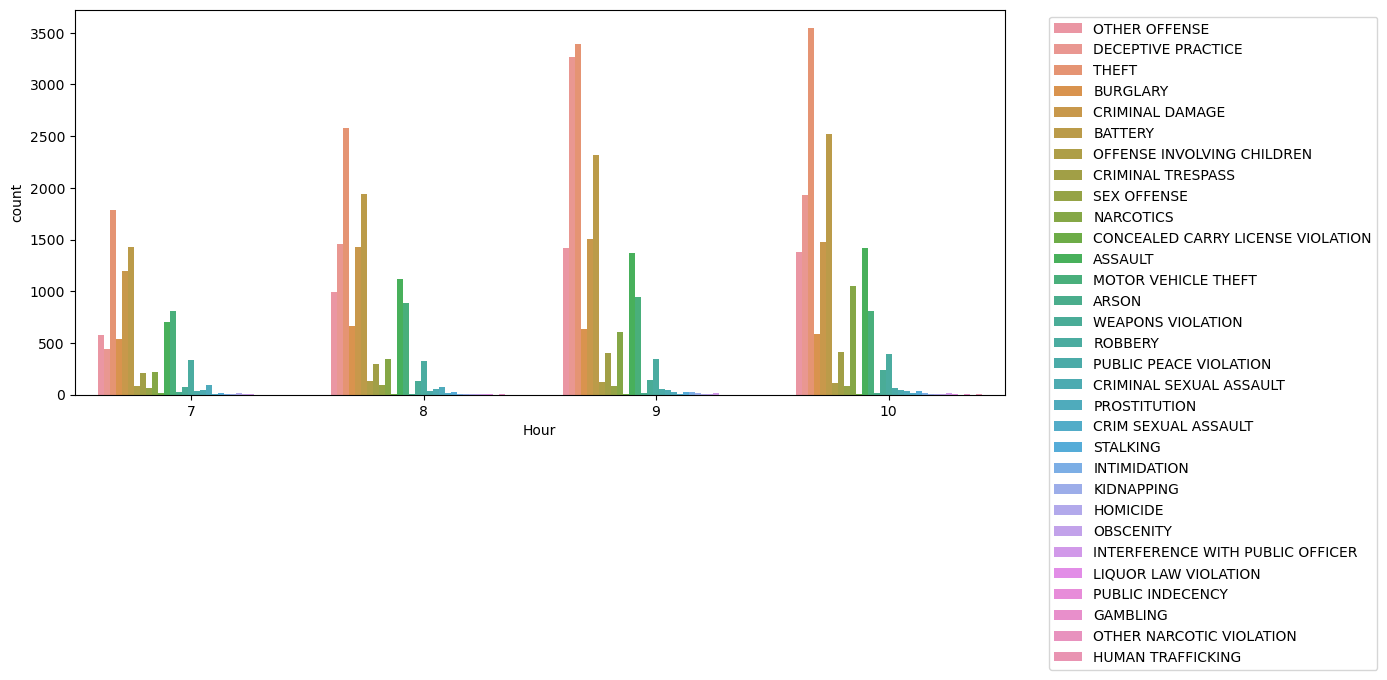

In [68]:
# Visualize AM Rush hour
fig, ax = plt.subplots(figsize = (12,5))
ax = sns.countplot(data = am_df, x = 'Hour', hue= 'Primary Type')
ax.legend(loc='best', bbox_to_anchor=(1.04, 1));

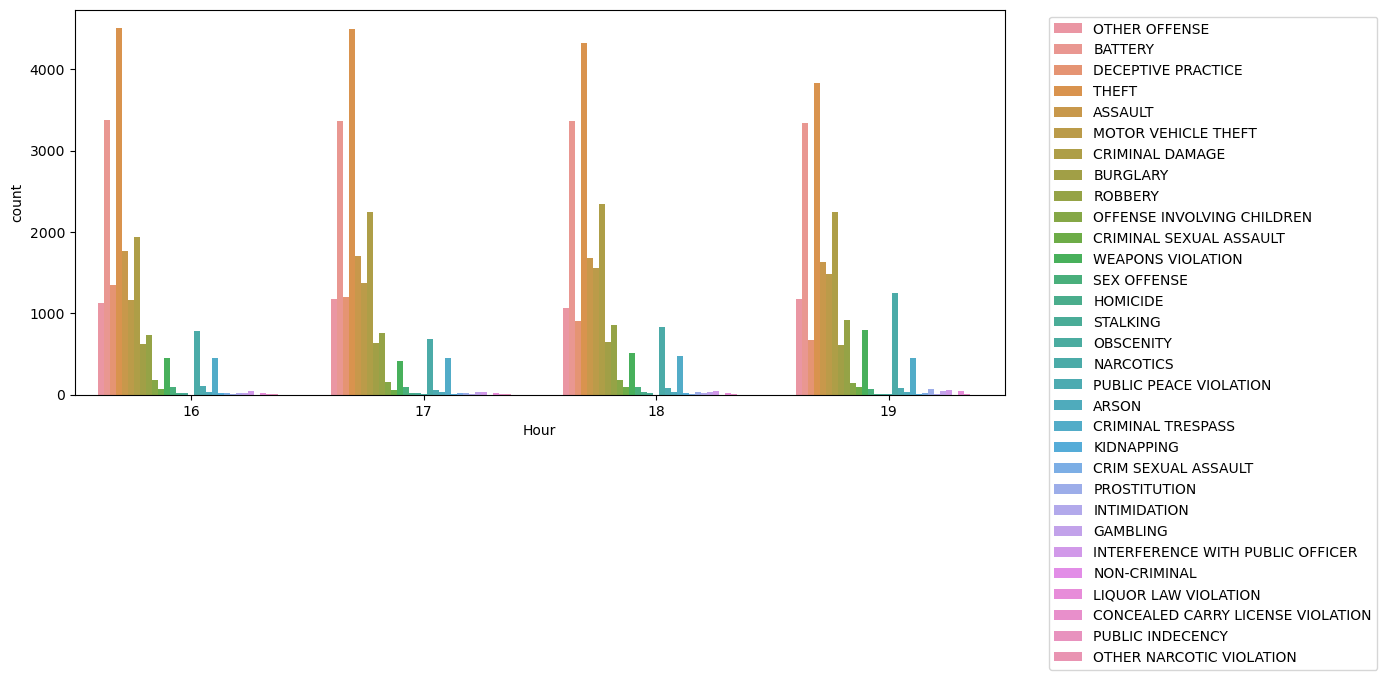

In [69]:
# Visualize PM Rush hour
fig, ax = plt.subplots(figsize = (12,5))
ax = sns.countplot(data = pm_df, x = 'Hour', hue= 'Primary Type')
ax.legend(loc='best', bbox_to_anchor=(1.04, 1));

- What are the top 5 most common crimes during AM rush hour?
  - Other offense
  - Deceptive practice
  - Theft
  - Burglary
  - Criminal Damage

- What are the top 5 most common crimes during PM rush hour?
  - Other offense
  - Battery
  - Deceptive practice
  - Theft
  - Assault 

- Are Motor Vehicle Thefts more common during AM rush hour or PM rush hour?
  - PM